In [ ]:
import csv
import random

def generate_graph(csv_file):
    graph = {}
    vertices = set()

    with open(csv_file, 'r') as file:
      reader = csv.DictReader(file)

      for row in reader:
        source = row['full_id']
        target = row['full_id_2']

        weight = random.randint(1, 100)

        vertices.add(source)
        vertices.add(target)

        if source not in graph:
          graph[source] = []

        if target not in graph:
          graph[target] = []

        graph[source].append((target, weight))

    return graph, vertices

file_name = 'lavictoria-streets-intersections.csv'
graph, vertices = generate_graph(file_name)

In [ ]:
class DisjointSetVariant:
  def __init__(self, n):
    self.parent = list(range(n + 1))
    self.rank = [0] * (n + 1)

  def find(self, x):
    if self.parent[x] != x:
      self.parent[x] = self.find(self.parent[x])
    return self.parent[x]

  def union(self, x, y):
    root_x = self.find(x)
    root_y = self.find(y)
    if root_x != root_y:
      if self.rank[root_x] < self.rank[root_y]:
        self.parent[root_x] = root_y
      elif self.rank[root_x] > self.rank[root_y]:
        self.parent[root_y] = root_x
      else:
        self.parent[root_y] = root_x
        self.rank[root_x] += 1

def kruskal_max_spanning_tree(edges, num_vertices):
  edges.sort(key=lambda x: x[2], reverse=True)

  ds = DisjointSetVariant(num_vertices)

  max_spanning_tree = []

  for u, v, weight in edges:
    if ds.find(u) != ds.find(v):
      ds.union(u, v)
      max_spanning_tree.append((u, v, weight))

  return max_spanning_tree


# Asignar un índice único a cada identificador del grafo
vertex_index = {vertex: index for index, vertex in enumerate(vertices, start=1)}

# Convertir el grafo a una lista de aristas
edge_list = []
for source, adjacents in graph.items():
  for adjacent, weight in adjacents:
    edge_list.append((vertex_index[source], vertex_index[adjacent], weight))

# Obtener el número de vértices en el grafo
num_vertices = len(vertices)

# Obtener el árbol de expansión máxima utilizando el algoritmo de Kruskal
max_kruskal = kruskal_max_spanning_tree(edge_list, num_vertices)

print(len(max_kruskal))


1122


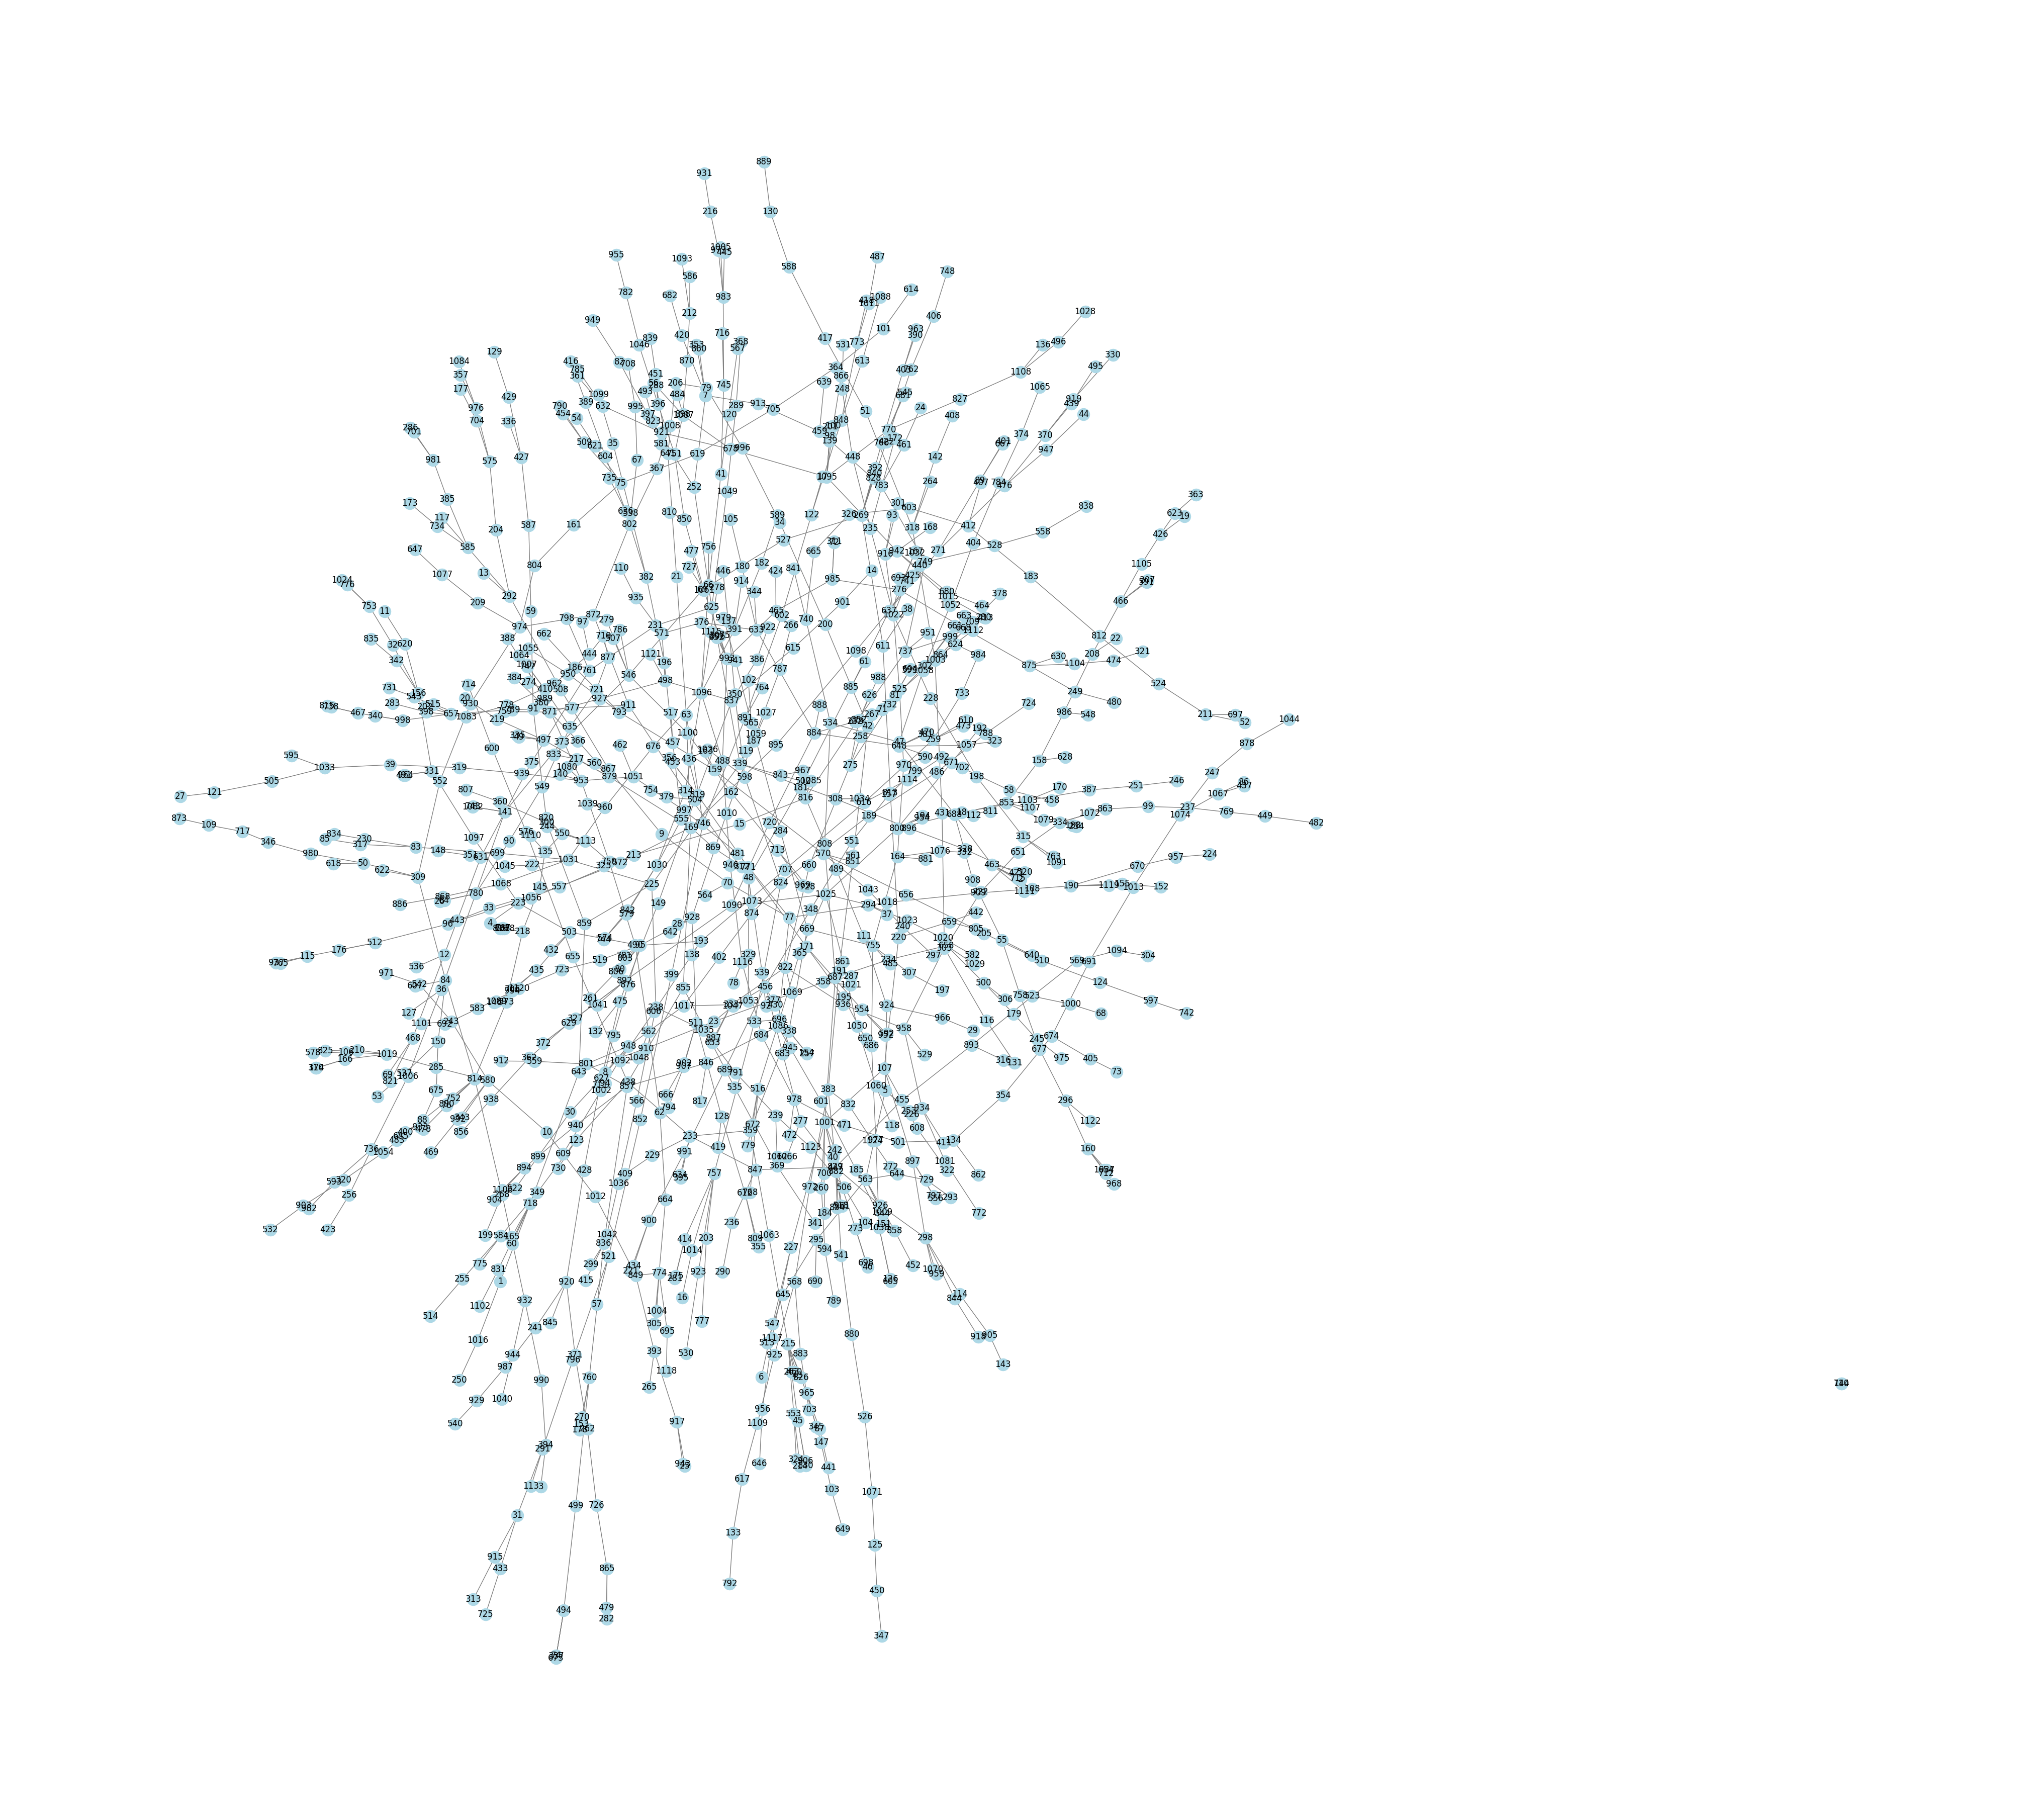

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo de NetworkX utilizando las aristas del árbol de expansión máxima
G = nx.Graph()
G.add_weighted_edges_from(max_kruskal)

# Definir una disposición del grafo utilizando el algoritmo spring_layout
layout = nx.spring_layout(G)

# Crear una nueva figura con un tamaño más grande
plt.figure(figsize=(40, 36))

# Dibujar el grafo original con estilo predeterminado
nx.draw(G, pos=layout, with_labels=True, node_color='lightblue', edge_color='black')

# Mostrar el grafo original
plt.show()